Imports

In [1]:
import numpy as np
import os
from plotting import plot_sample_efficiency_curve, COLOR_MAPPING, LABEL_MAPPING, load_and_process_experiment_data, arange_frames

Load data

In [2]:
# Determine tiles visited
path = f"./results/mp_off_dense/trxl_rec/"
original_shape = (51, 5, 50, 3)
rewards = load_and_process_experiment_data(path, "reward").reshape(original_shape)
successes = load_and_process_experiment_data(path, "success").reshape(original_shape)
seeds = load_and_process_experiment_data(path, "seed").reshape(original_shape)
successes_agg = successes[:, :, :, :].max(axis=(0, 1, 3))
tiles_visited = rewards[:, :, :, :].max(axis=(0, 1, 3)) - 0.9
print(f"Tiles visited: {tiles_visited * 10}")

['./results/mp_off_dense/trxl_rec/novel_0.res', './results/mp_off_dense/trxl_rec/novel_1.res', './results/mp_off_dense/trxl_rec/novel_2.res', './results/mp_off_dense/trxl_rec/novel_3.res', './results/mp_off_dense/trxl_rec/novel_4.res']
['./results/mp_off_dense/trxl_rec/novel_0.res', './results/mp_off_dense/trxl_rec/novel_1.res', './results/mp_off_dense/trxl_rec/novel_2.res', './results/mp_off_dense/trxl_rec/novel_3.res', './results/mp_off_dense/trxl_rec/novel_4.res']
['./results/mp_off_dense/trxl_rec/novel_0.res', './results/mp_off_dense/trxl_rec/novel_1.res', './results/mp_off_dense/trxl_rec/novel_2.res', './results/mp_off_dense/trxl_rec/novel_3.res', './results/mp_off_dense/trxl_rec/novel_4.res']
Tiles visited: [ 8.  9.  9. 12.  9. 10.  8.  7. 12.  9. 10. 10. 10. 10. 11.  9.  9.  8.
  9. 10.  8.  9.  8.  9.  8. 12.  7.  9. 11.  7. 11. 12.  9.  9.  8. 10.
 11.  7. 10.  9.  6.  6. 10.  7.  9. 10. 11. 11.  7. 11.]


In [3]:
envs = [
    "mm_act_grid",
    "mm_grid",
    "mm10",
    "mp_grid_on",
    "mp_grid_off",
    "mp_off_dense",
    "ss"
]

run_ids = [
    "gru",
    "trxl",
    "gru_rec",
    "trxl_rec",
    "gru_25",
    "trxl_25",
    "gru_rec_25",
    "trxl_rec_25",
]

skip = 1

# Loop over all possible paths and load data
raw_data_dict = {}
for env in envs:
    raw_data_dict[env] = {}
    for run_id in run_ids:
        path = f"./results/{env}/{run_id}/"
        if os.path.exists(path) and os.path.isdir(path):
            data = load_and_process_experiment_data(path, "length")

            # Average over the episodes dimension
            data = data.mean(axis=2)

            multiplier = 1

            raw_data_dict[env][run_id] = data[::skip] * multiplier
        else:
            continue


['./results/mm_act_grid/gru/novel_0.res', './results/mm_act_grid/gru/novel_1.res', './results/mm_act_grid/gru/novel_2.res', './results/mm_act_grid/gru/novel_3.res', './results/mm_act_grid/gru/novel_4.res']
['./results/mm_act_grid/trxl/novel_0.res', './results/mm_act_grid/trxl/novel_1.res', './results/mm_act_grid/trxl/novel_2.res', './results/mm_act_grid/trxl/novel_3.res', './results/mm_act_grid/trxl/novel_4.res']
['./results/mm_grid/gru/novel_0.res', './results/mm_grid/gru/novel_1.res', './results/mm_grid/gru/novel_2.res', './results/mm_grid/gru/novel_3.res', './results/mm_grid/gru/novel_4.res']
['./results/mm_grid/trxl/novel_0.res', './results/mm_grid/trxl/novel_1.res', './results/mm_grid/trxl/novel_2.res', './results/mm_grid/trxl/novel_3.res', './results/mm_grid/trxl/novel_4.res']
['./results/mm10/gru/novel_0.res', './results/mm10/gru/novel_1.res', './results/mm10/gru/novel_2.res', './results/mm10/gru/novel_3.res', './results/mm10/gru/novel_4.res']
['./results/mm10/trxl/novel_0.res',

Process and aggregate data

(101, 5, 150)

101 Checkpoints
5 Runs
150 Episodes

In [4]:
# Aggregate data
mean_dict = {}
std_dict = {}
min_dict = {}
max_dict = {}
for env in raw_data_dict:
    mean_dict[env] = {}
    std_dict[env] = {}
    min_dict[env] = {}
    max_dict[env] = {}
    for run_id in raw_data_dict[env]:
        mean_dict[env][run_id] = raw_data_dict[env][run_id].mean(axis=1)
        std_dict[env][run_id] = raw_data_dict[env][run_id].std(axis=1)
        min_dict[env][run_id] = raw_data_dict[env][run_id].min(axis=1)
        max_dict[env][run_id] = raw_data_dict[env][run_id].max(axis=1) 

Plot mean and std across runs

mm_act_grid

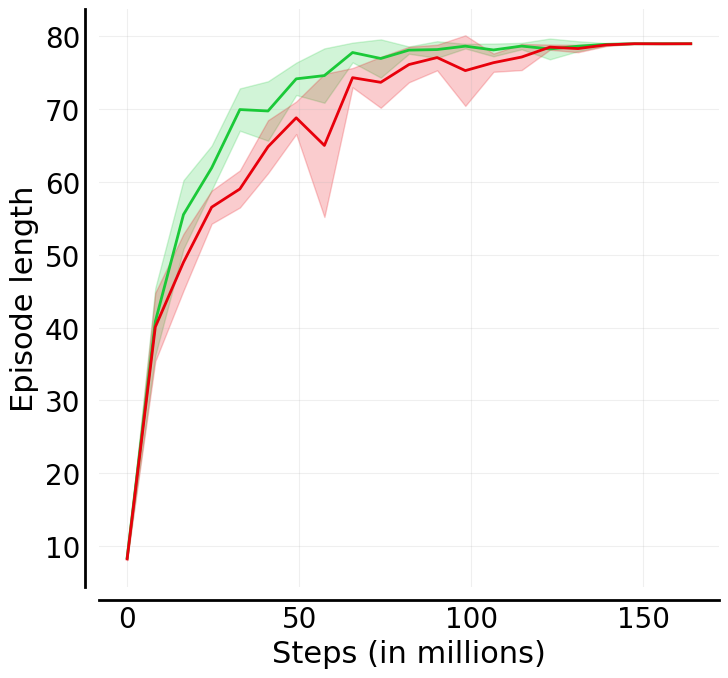

In [5]:
frames = arange_frames(mean_dict["mm_act_grid"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mm_act_grid"],
                             std_dict["mm_act_grid"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

mm_grid

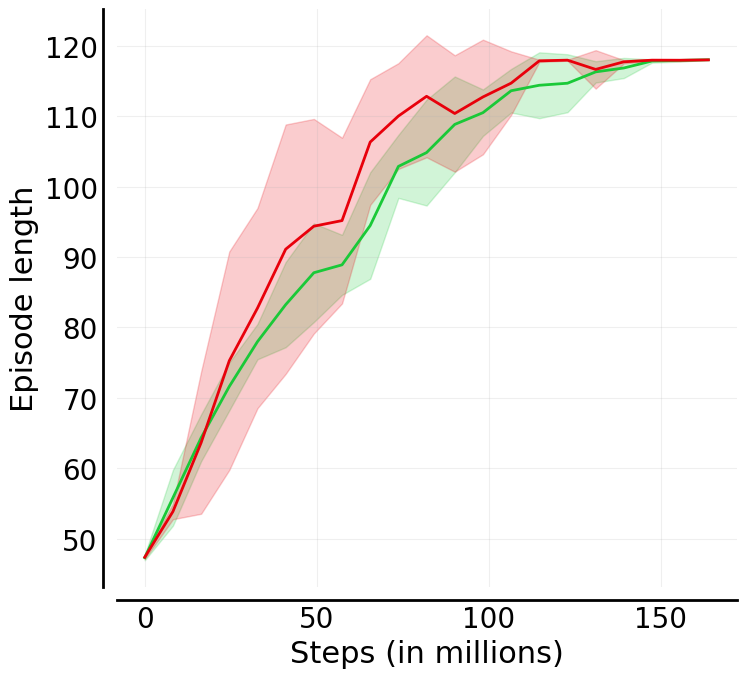

In [6]:
frames = arange_frames(mean_dict["mm_grid"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mm_grid"],
                             std_dict["mm_grid"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

mm10

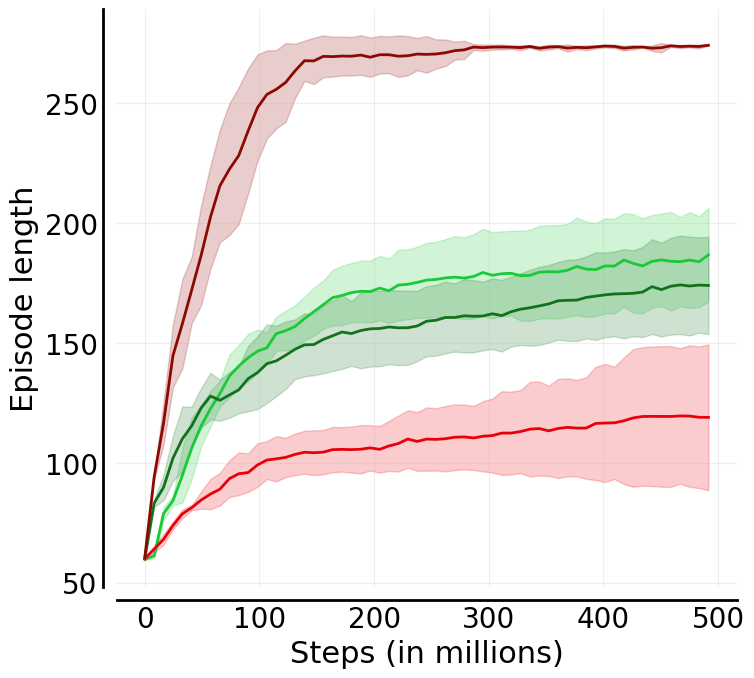

In [7]:
frames = arange_frames(mean_dict["mm10"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mm10"],
                             std_dict["mm10"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

mp_grid_on

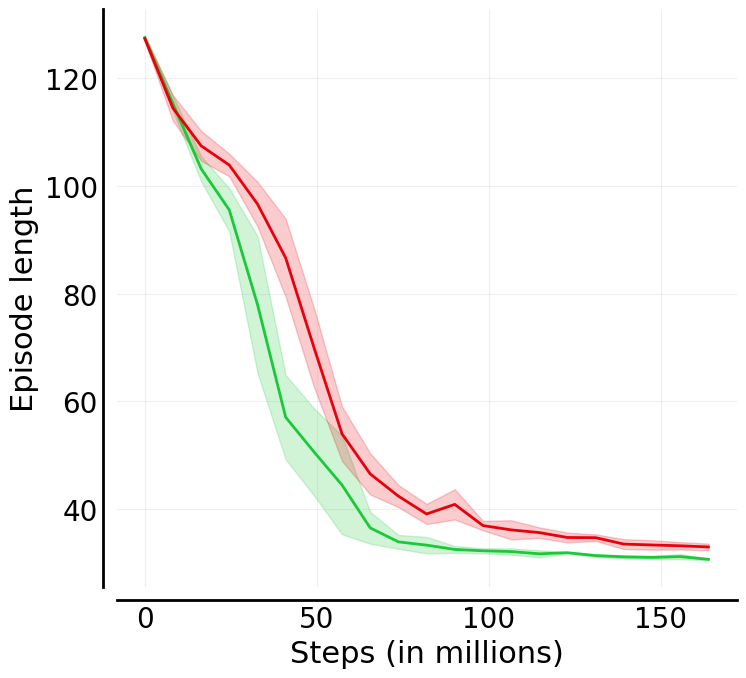

In [8]:
frames = arange_frames(mean_dict["mp_grid_on"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mp_grid_on"],
                             std_dict["mp_grid_on"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

mp_grid_off

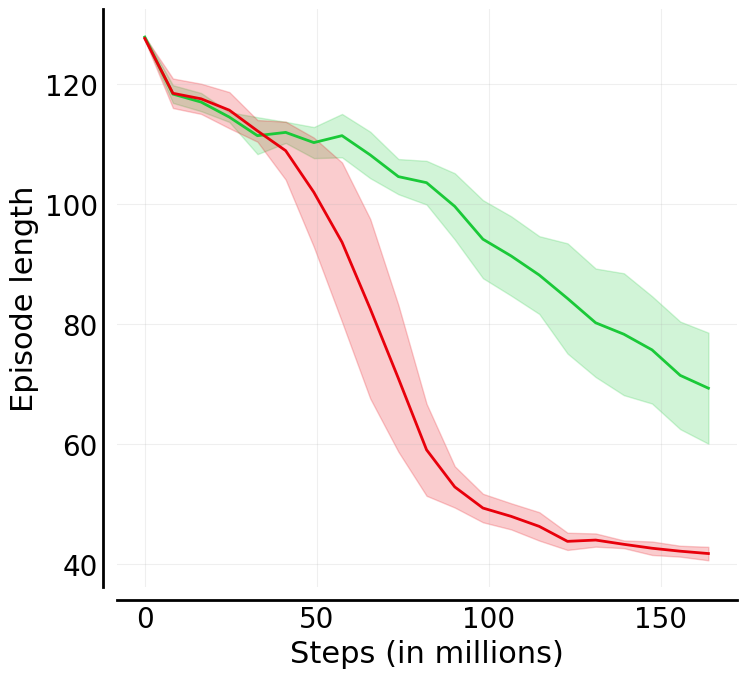

In [9]:
frames = arange_frames(mean_dict["mp_grid_off"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mp_grid_off"],
                             std_dict["mp_grid_off"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

mp_off_dense

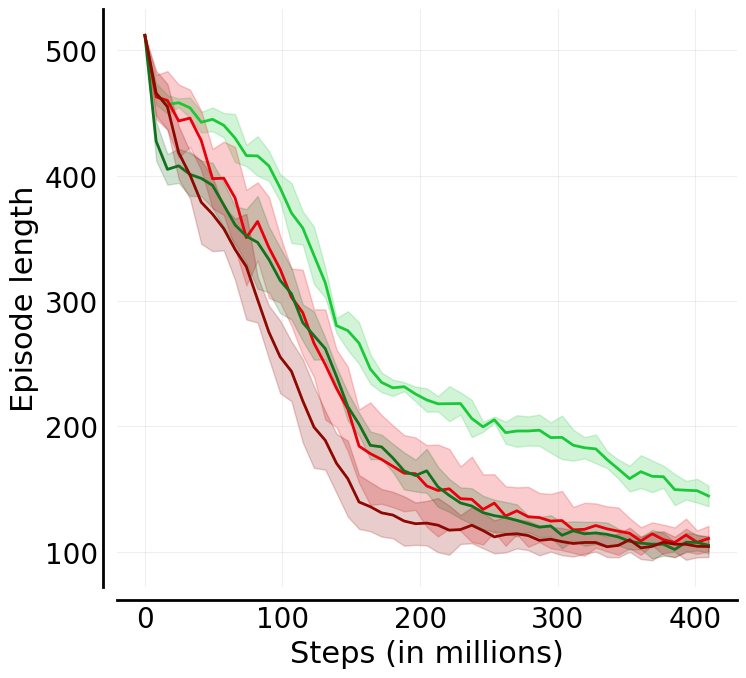

In [10]:
frames = arange_frames(mean_dict["mp_off_dense"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["mp_off_dense"],
                             std_dict["mp_off_dense"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot mean and std across runs

ss

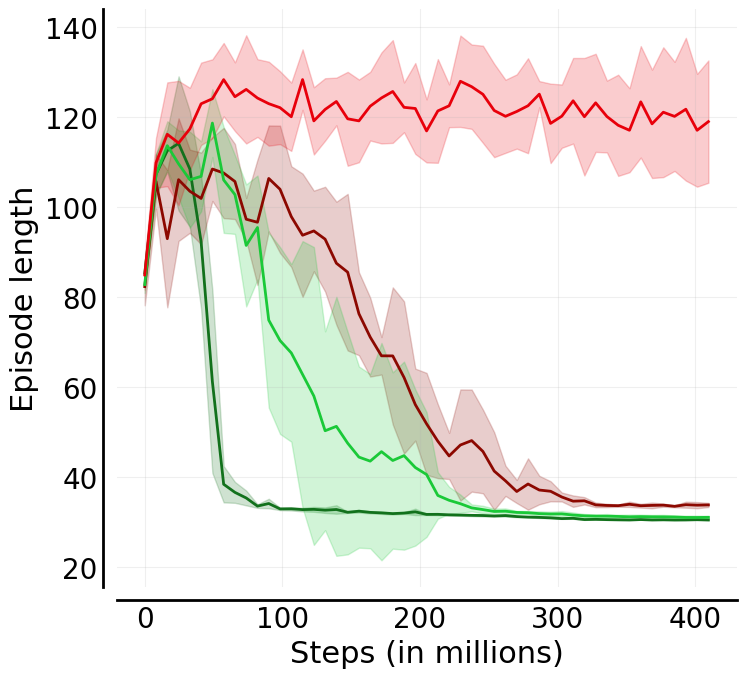

In [11]:
frames = arange_frames(mean_dict["ss"]["gru_rec_25"].shape[0])
plot_sample_efficiency_curve(frames,
                             mean_dict["ss"],
                             std_dict["ss"],
                             algorithms=["gru_rec_25", "trxl_rec_25", "gru_25", "trxl_25"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mm_act_grid

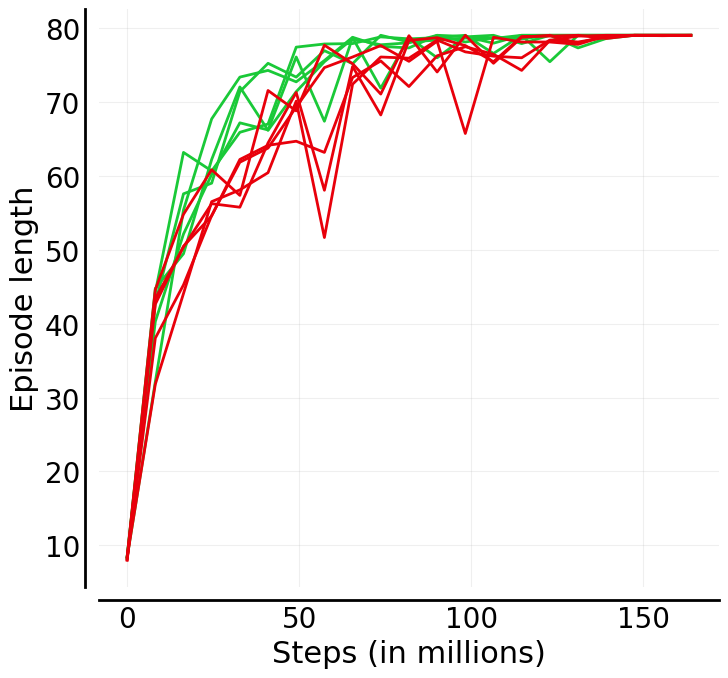

In [12]:
frames = arange_frames(mean_dict["mm_act_grid"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mm_act_grid"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mm_grid

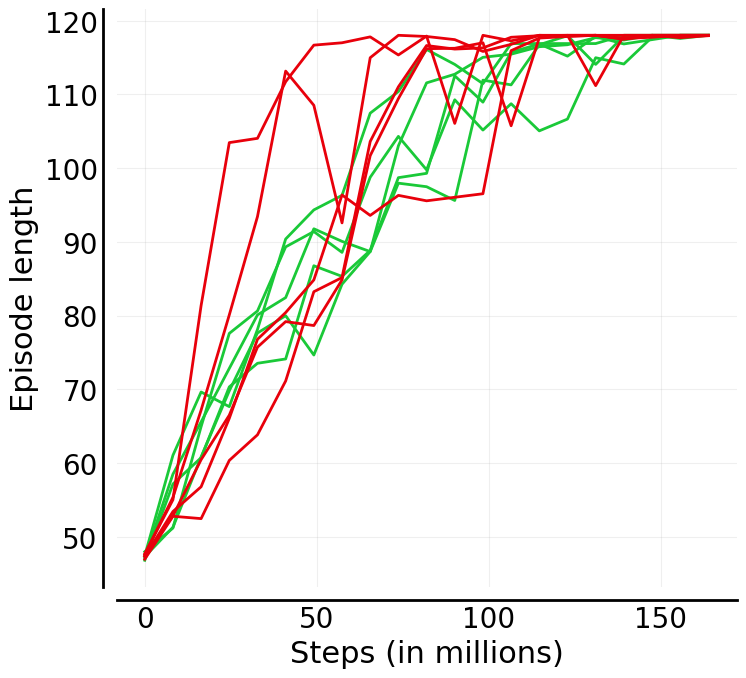

In [13]:
frames = arange_frames(mean_dict["mm_grid"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mm_grid"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mm10

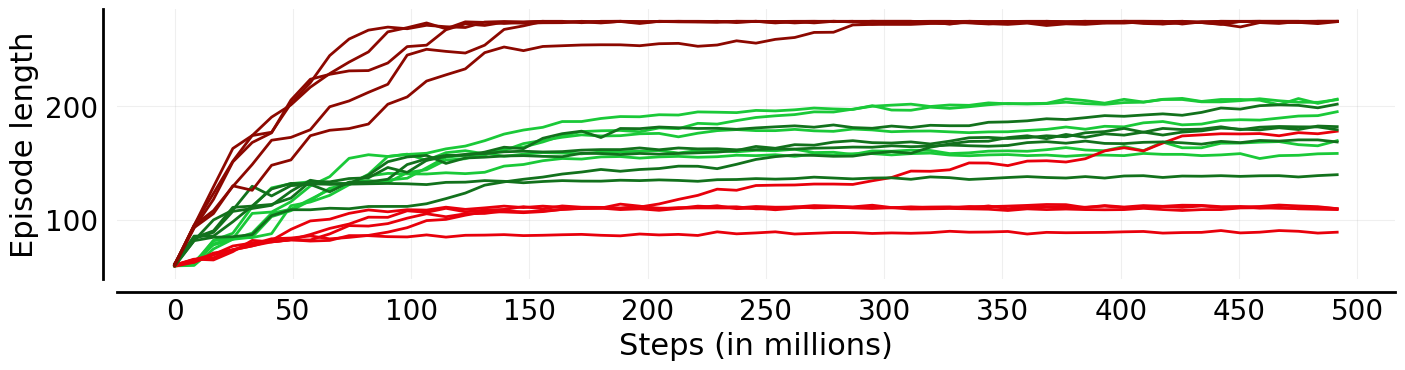

In [14]:
frames = arange_frames(mean_dict["mm10"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mm10"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 501, 50)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mp_grid_on

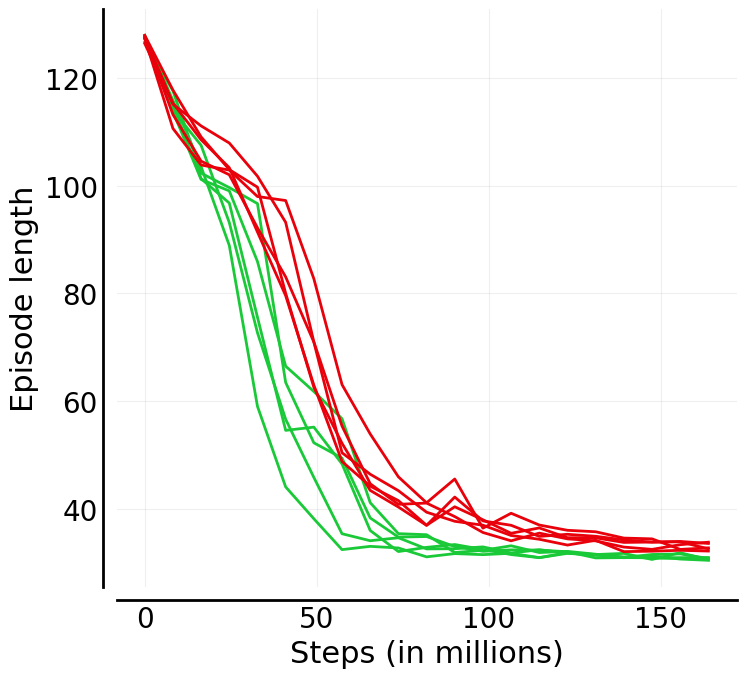

In [15]:
frames = arange_frames(mean_dict["mp_grid_on"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mp_grid_on"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mp_grid_off

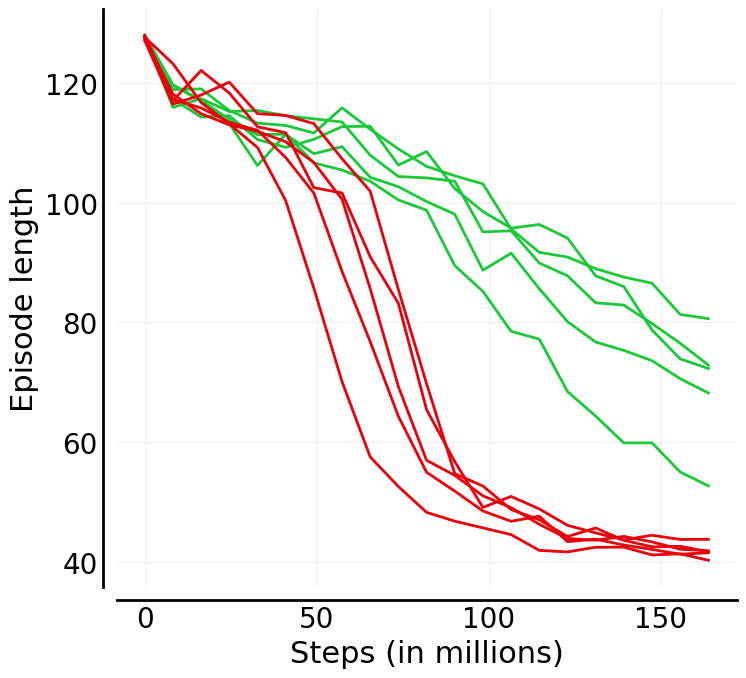

In [16]:
frames = arange_frames(mean_dict["mp_grid_off"]["gru"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mp_grid_off"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(8,7.5),
                            #  xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

mp_off_dense

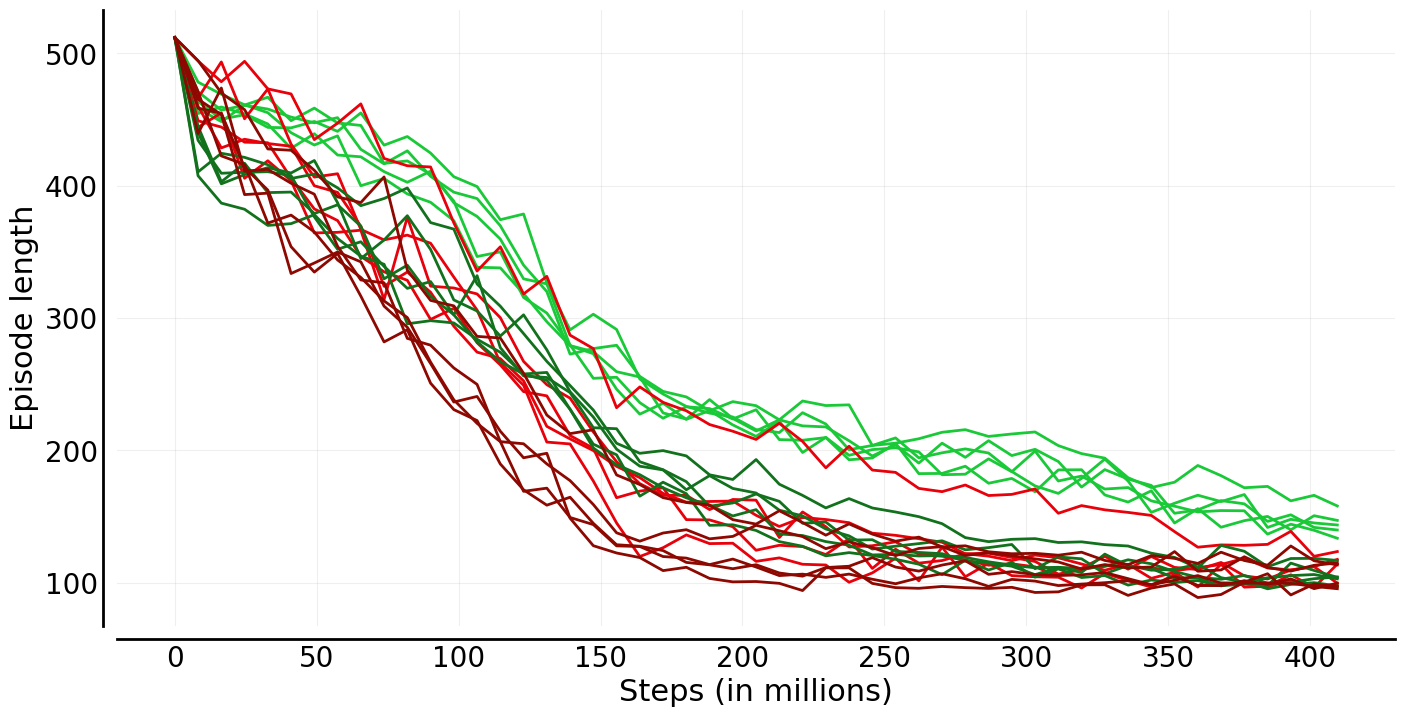

In [17]:
frames = arange_frames(mean_dict["mp_off_dense"]["trxl"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["mp_off_dense"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,8),
                             xticks=list(range(0, 420, 50)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")

Plot individual mean

ss

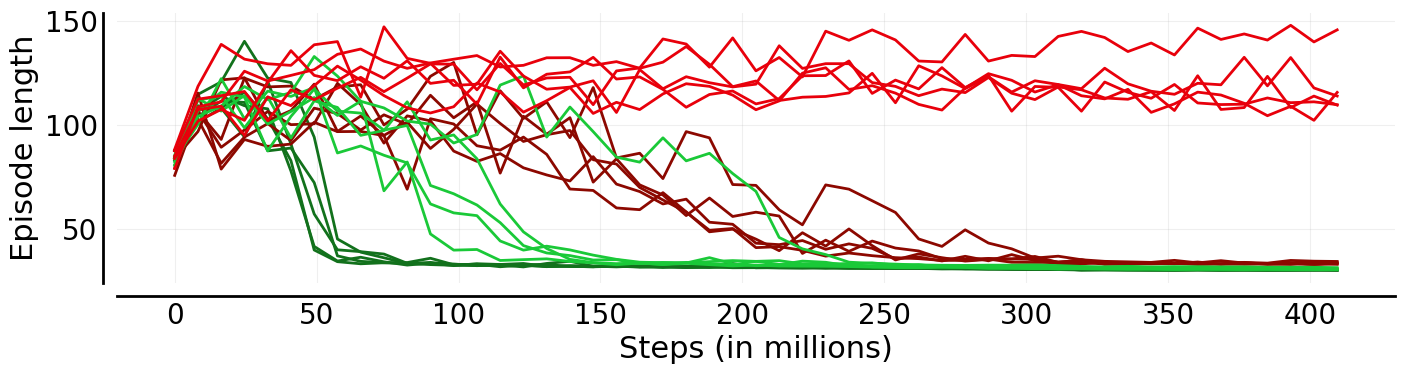

In [18]:
frames = arange_frames(mean_dict["ss"]["gru_rec_25"].shape[0])
plot_sample_efficiency_curve(frames,
                             raw_data_dict["ss"],
                             algorithms=["gru_rec_25", "trxl_rec_25", "gru_25", "trxl_25"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 420, 50)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode length",
                             marker="")